In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Данные**

In [101]:
data = pd.read_excel('/content/Рекламный аналитик _ стажировка.xlsx', sheet_name='data')
data.head()

,Client,client_id,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost_rub_wo_NDS,Сonversions
0,Бета,234679,2020-07-01,ВКЛАДЫ,Desktop,Networks,cpc_video,none,Phrase,0,0,0.000000,0
1,Гамма,458303,2019-04-01,ДЕБЕТОВЫЕ КАРТЫ,Desktop,Networks,cpc_video,none,Phrase,76722,2002,19467.482339,3
2,Гамма,458303,2019-04-01,ДЕБЕТОВЫЕ КАРТЫ,Desktop,Networks,cpc_video,none,Retargeting,9260,116,2590.924703,0
3,Гамма,458303,2019-06-01,ДЕБЕТОВЫЕ КАРТЫ,Desktop,Networks,cpc_video,none,Retargeting,0,0,0.000000,0
4,Гамма,458303,2019-04-01,ДЕБЕТОВЫЕ КАРТЫ,Mobile,Networks,cpc_video,none,Phrase,27140,825,4181.504949,0


**Период для анализа: январь-август 2020г.**

**Категории: Потребительское кредитование.**

Выберем все данные по потребительскому кредитованию за этот период:

In [102]:
df = data.query("'2020-01-01' <= Month <= '2020-08-31' & Category == 'ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ'")
df.head()

,Client,client_id,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost_rub_wo_NDS,Сonversions
35,Бета,234679,2020-07-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,cpc_video,none,Phrase,1845674,8005,70685.545932,0
36,Бета,234679,2020-07-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,cpc_video,none,Retargeting,315901,2042,18573.896059,0
37,Бета,234679,2020-07-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Mobile,Networks,cpc_video,none,Phrase,34037,465,2974.504195,0
38,Бета,234679,2020-07-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Mobile,Networks,cpc_video,none,Retargeting,155489,1251,9388.322008,3
970,Гамма,458303,2020-02-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,image_ad,none,Phrase,3613,9,123.869593,0


In [4]:
df.shape

(1161, 13)

### **Общие наблюдения**

Посмотрим на распределение показов, кликов, расходов и конверсии по клиентам:

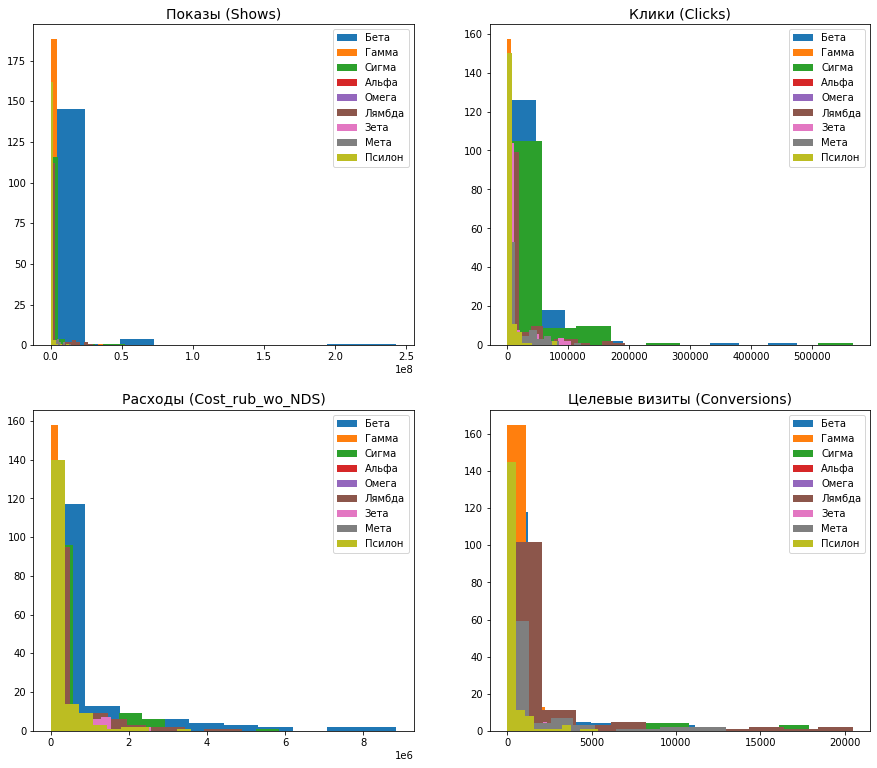

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 13))

plt.subplot(2, 2, 1)
for c in pd.unique(df.Client):
  plt.hist(df[df['Client'] == c].Shows, label=c)
  plt.legend(loc = 'best')
  plt.title('Показы (Shows)', fontsize = 14)

plt.subplot(2, 2, 2)
for c in pd.unique(df.Client):
  plt.hist(df[df['Client'] == c].Clicks, label=c)
  plt.legend(loc = 'best')
  plt.title('Клики (Clicks)', fontsize = 14)

plt.subplot(2, 2, 3)
for c in pd.unique(df.Client):
  plt.hist(df[df['Client'] == c].Cost_rub_wo_NDS, label=c)
  plt.legend(loc = 'best')
  plt.title('Расходы (Cost_rub_wo_NDS)', fontsize = 14)

plt.subplot(2, 2, 4)
for c in pd.unique(df.Client):
  plt.hist(df[df['Client'] == c].Сonversions, label=c)
  plt.legend(loc = 'best')
  plt.title('Целевые визиты (Сonversions)', fontsize = 14)

plt.show()

'Бета', 'Гамма' и 'Псилон' лидируют по показам, кликами и конверсии, однако у них так же наибольшие расходы. 'Сигма' и 'Лямбда' имеют довольно высокие показы, клики и конверсию при меньших расходах.

Посмотрим отдельно на Омегу:

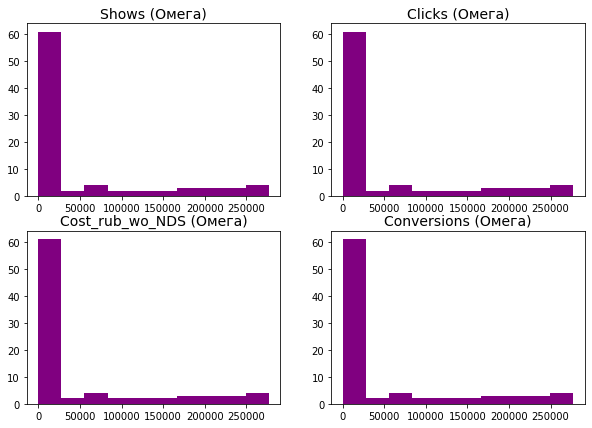

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

for i, c in enumerate(['Shows', 'Clicks', 'Cost_rub_wo_NDS', 'Сonversions']):
  plt.subplot(2, 2, i+1)
  plt.hist(df[df['Client'] == 'Омега'].Shows, color='purple')
  plt.title(c + ' (Омега)', fontsize = 14)

plt.show()

### **Инструменты, площадки, устройства компаний**

Тип устройства (Device):

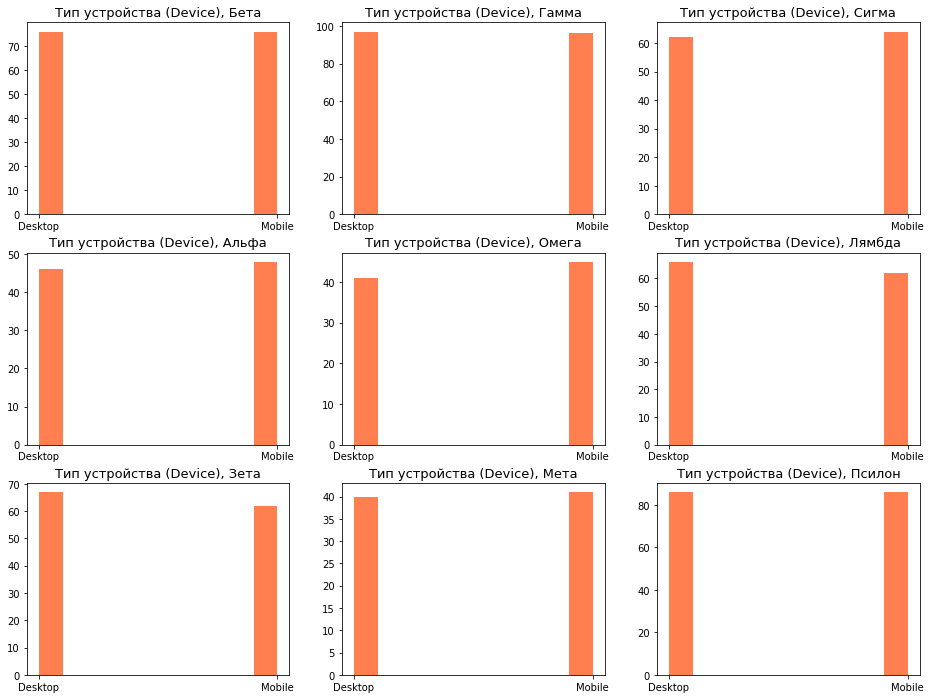

In [128]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))

for i, c in enumerate(pd.unique(df.Client)):
  plt.subplot(3, 3, i + 1)
  plt.hist(df[df['Client'] == c].Device, color='coral')
  plt.title('Тип устройства (Device), ' + c, fontsize = 13)
plt.show()

Тип площадки (Place):

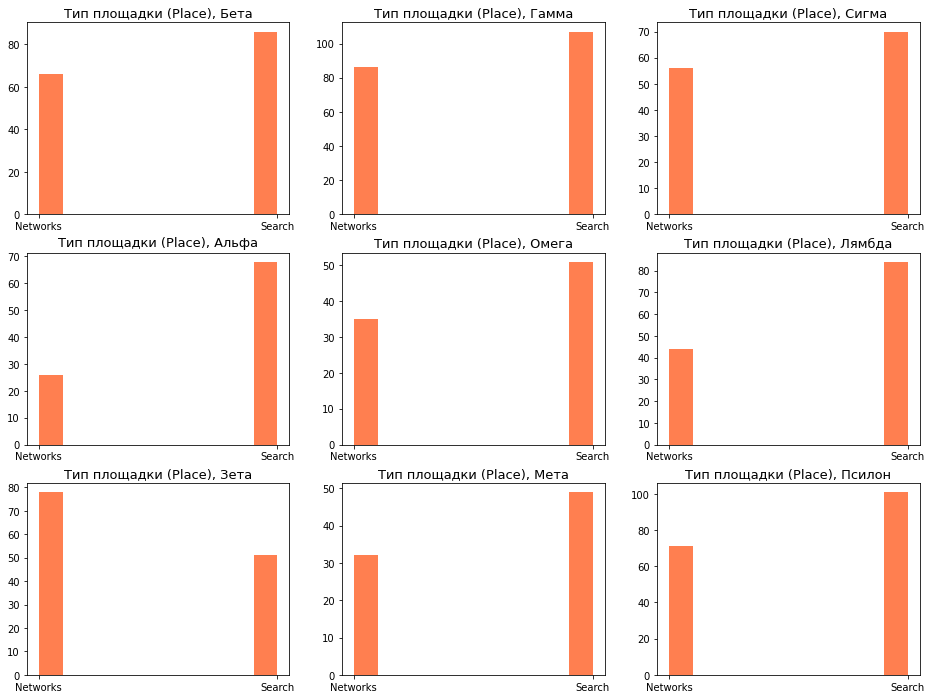

In [127]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))

for i, c in enumerate(pd.unique(df.Client)):
  plt.subplot(3, 3, i + 1)
  plt.hist(df[df['Client'] == c].Place, color='coral')
  plt.title('Тип площадки (Place), ' + c, fontsize = 13)
plt.show()

Тип объявления (BannerType):

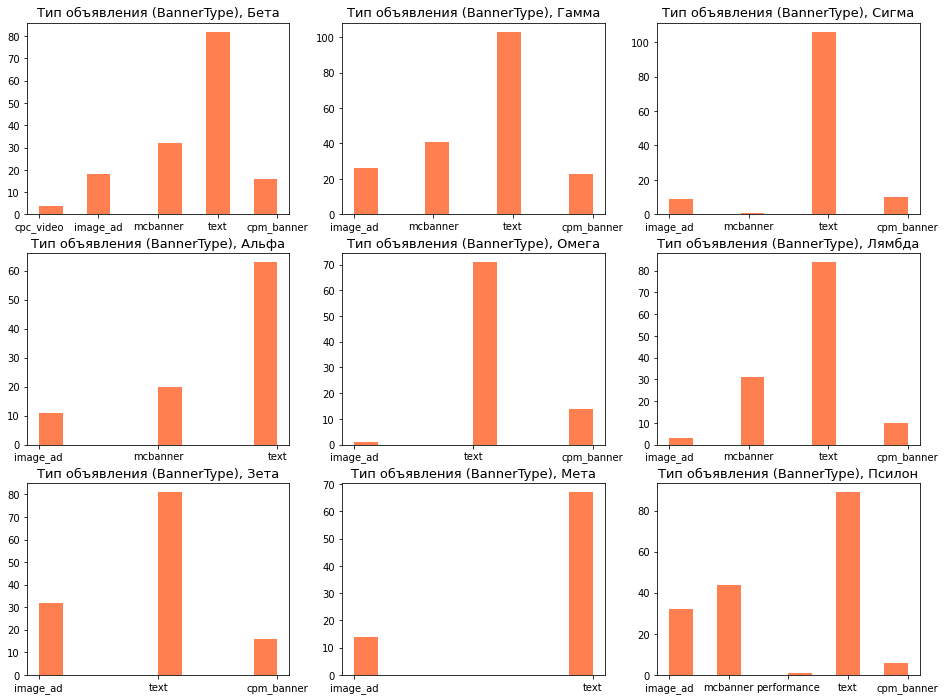

In [126]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))

for i, c in enumerate(pd.unique(df.Client)):
  plt.subplot(3, 3, i + 1)
  plt.hist(df[df['Client'] == c].BannerType, color='coral')
  plt.title('Тип объявления (BannerType), ' + c, fontsize = 13)
plt.show()

Тип таргетинга (TargetingType):

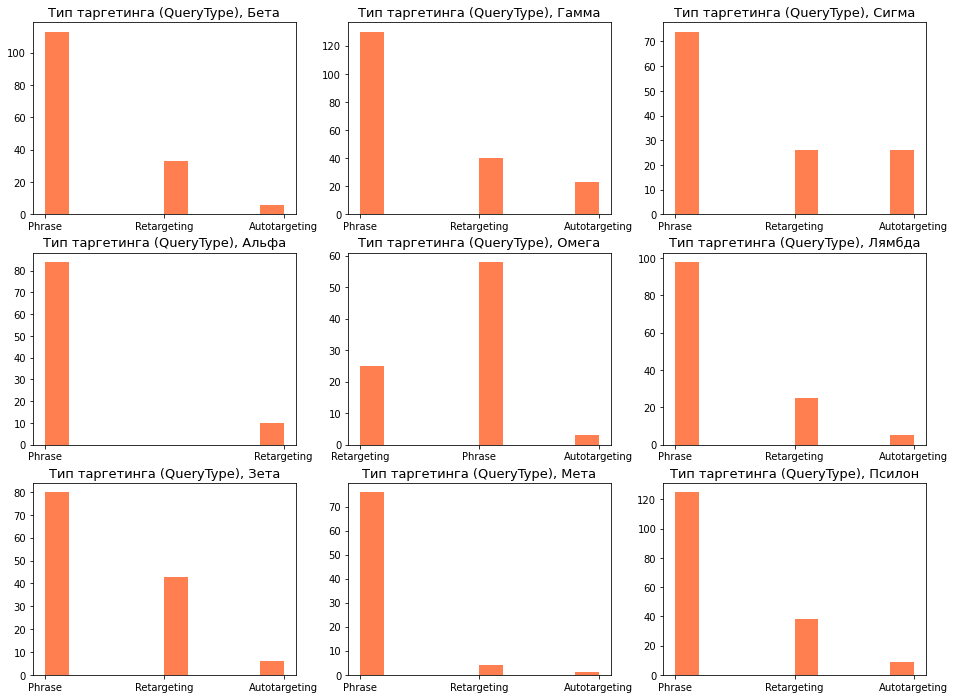

In [140]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))

for i, c in enumerate(pd.unique(df.Client)):
  plt.subplot(3, 3, i + 1)
  plt.hist(df[df['Client'] == c].TargetingType, color='coral')
  plt.title('Тип таргетинга (QueryType), ' + c, fontsize = 13)
plt.show()

Тип запроса (только для Place: Search):

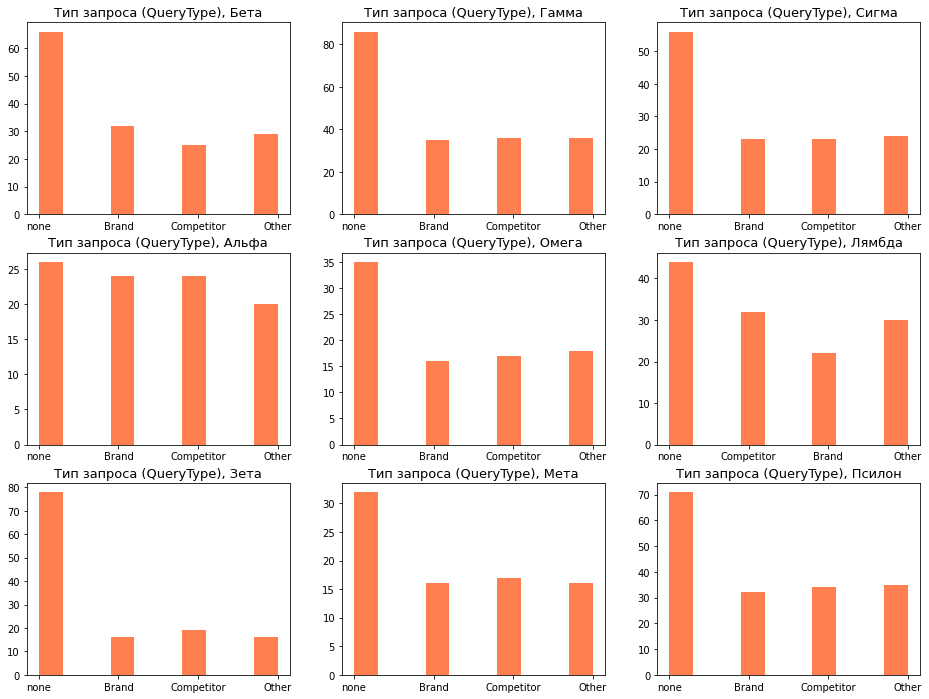

In [138]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))

for i, c in enumerate(pd.unique(df.Client)):
  plt.subplot(3, 3, i + 1)
  plt.hist(df[df['Client'] == c]['QueryType (search only)'], color='coral')
  plt.title('Тип запроса (QueryType), ' + c, fontsize = 13)
plt.show()

### **Показатели эффективности**

**Цель клиента:** получать больше целевых визитов по меньшей стоимости.

Рассмотрим некоторые показатели эффективности.

In [103]:
# табличка для сохранения показателей эффективности по клиентам
perform_ind = pd.DataFrame(columns=['CPA', 'CTR', 'CPC'])

**CPA** (Cost Per Action) — стоимость одного целевого действия пользователя.

CPA = Расходы на рекламную кампанию / Количество целевых действий пользователей

In [104]:
for c in pd.unique(df.Client): 
  perform_ind.loc[c, 'CPA'] = sum(df[df['Client'] == c].Cost_rub_wo_NDS) /  sum(df[df['Client'] == c].Сonversions)

**CTR** (Click-Through Rate) — кликабельность конкретного объявления. 

CTR = количество кликов на объявление / количество показов этого объявления х 100%

In [105]:
for c in pd.unique(df.Client): 
  perform_ind.loc[c, 'CTR'] = (sum(df[df['Client'] == c].Clicks) * 100.) / sum(df[df['Client'] == c].Shows)

**CPC** (Сost per Click) — стоимость клика по рекламному объявлению. Дает понять, сколько стоил целевой переход с рекламы на сайт. Чем ниже СРС — тем дешевле стоимость привлечения клиента.

CPC = стоимость размещения рекламы / количество кликов

In [106]:
for c in pd.unique(df.Client): 
  perform_ind.loc[c, 'CPC'] = sum(df[df['Client'] == c].Cost_rub_wo_NDS) / sum(df[df['Client'] == c].Clicks)

**Результат:**

In [107]:
perform_ind

,CPA,CTR,CPC
Бета,651.371,0.429114,33.884
Гамма,260.417,0.628185,35.0966
Сигма,259.058,1.30033,17.4979
Альфа,622.224,1.61295,60.3844
Омега,424.489,15.1893,46.3172
Лямбда,267.756,0.870539,25.9884
Зета,1732.07,23.9028,28.0787
Мета,155.415,1.35976,15.6386
Псилон,684.376,1.01814,58.1958


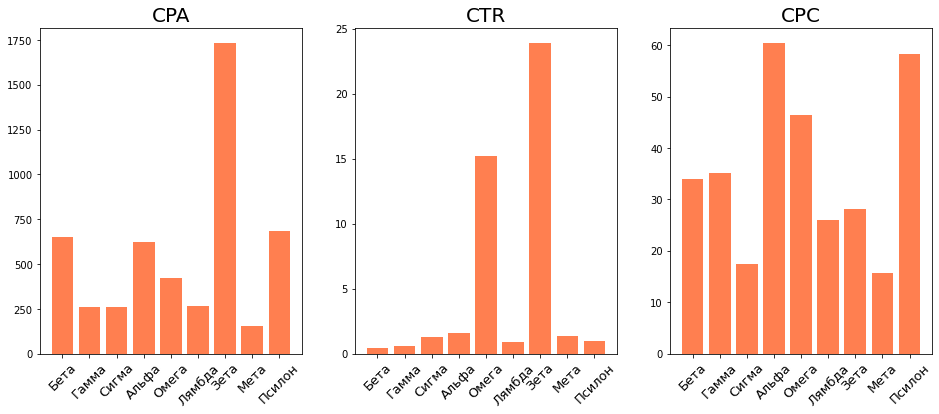

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

for i, p in enumerate(perform_ind.columns):
  plt.subplot(1, 3, i+1)
  plt.bar(range(perform_ind.shape[0]), perform_ind[p], color = "coral")
  plt.xticks(range(perform_ind.shape[0]), perform_ind.index, rotation = 45, fontsize = 13)
  plt.title(p, fontsize = 20)

plt.show()

Итак, стоимость одного целевого действия (CPA) и кликабельность объявления (CTR) наибольшии у компании 'Зета' (высокая цена цели и кликабельность понизили ее стоимость привлечения клиента CPC).

У 'Омега' показатель CPA меньше, чем у 4х конкурентов: 'Бета', 'Альфа', 'Зета', 'Псилон'. По CTR 'Омега' занимает 2ое место и имеет значительный отрыв от остальных конкурентов. Однако клики — это не цельевой визит, поэтому CTR — промежуточный показатель.

По показателю CPC 'Омега' занимает 3ье место, но имеет не такой большой отрыв от некоторых конкурентов.

Относительно низкая цена цели (CPA) 'Омега' при высокой кликабельности (CTR) дают большую стоимость привлечения клиента (CPC).